In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#declaring norm function with the 2d array dataset
def norm(dataset):
    #looping though each column index except the last column
    for column_index in range(dataset.shape[1] - 1):
        
        #find min and max values for the next step
        max_val = dataset[column_index].max()
        min_val = dataset[column_index].min()

        #normalizing the column to fall within the range [0,1]
        #modify the dataset in place. original values replaced by the normalized values
        dataset.iloc[:, column_index] = (dataset.iloc[:, column_index] - min_val) / (max_val - min_val)

In [3]:
def test(training, testing, w):    
    #testing
    #truth table vars
    true_positive = false_positive = true_negative = false_negative = 0
    
    # Iterating through the testing dataset to evaluate the model
    for row in range(testing.shape[0]):
        x = testing.iloc[row].values
        true = x[2]
        x[2] = 1.0
            
        predicted = 1 if np.dot(w, x) > 0 else 0
            
        if predicted:
            if true:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if true:
                false_negative += 1
            else:
                true_negative += 1

    actual_yes = true_positive + false_negative
    actual_no = true_negative + false_positive
    accuracy = (true_positive + true_negative) / testing.shape[0]
    true_positive_rate = (true_positive / actual_yes * 100)
    false_positive_rate = (false_positive / actual_no * 100)
    true_negative_rate = (true_negative / actual_no * 100)
    false_negative_rate = (false_negative / actual_yes * 100)
    print(f"accuracy: {round(accuracy * 100, 2)}%")
    print("\t\tTrue yes\t\tTrue no")
    print(f"Predicted yes\t{true_positive} ({round(true_positive_rate, 2)}%)\t\t{false_positive} ({round(false_positive_rate, 2)}%)")
    print(f"Predicted no\t{false_negative} ({round(false_negative_rate, 2)}%)\t\t{true_negative} ({round(true_negative_rate, 2)}%)")
    
    
    
    #plotting the data
    plt.figure()
    plt.scatter(training.iloc[:, 0], training.iloc[:, 1], c=training.iloc[:, 2], cmap='viridis', label='Training Data')
    plt.scatter(testing.iloc[:, 0], testing.iloc[:, 1], c=testing.iloc[:, 2], cmap='viridis', marker='x', label='Testing Data')

    #drawing the dividing line
    x = np.linspace(0, 1, 400)              #start at 0 end at 1
    y = -(w[0]/w[1])*x - (w[2]/w[1])        #constants for weights are [x, y, b] so (-x - b) / y

    plt.plot(x, y, '-r')
    plt.show()
    

In [4]:
#dataset: dataframe that holds the data the model is trained on
#split: fraction of the dataset that is being used for training
#error_threshold: function will keep updating the weights until the error becomes less than this
#alpha: the learning rate for the perceptron training
def train(dataset, split, error_threshold, alpha, activation_type):
    
    # Splitting the dataset into two classes based on the label in column 2
    group0 = dataset[dataset.iloc[:, 2] == 0]
    group1 = dataset[dataset.iloc[:, 2] == 1]
    
    # Determining the sample size for each class based on the split ratio provided
    sample_size = int(min(len(group0), len(group1)) * split)
    
    # Sampling an equal number of instances from both classes to maintain class balance
    sampled_subset0 = group0.sample(n = sample_size, random_state = 42)
    sampled_subset1 = group1.sample(n = sample_size, random_state = 42)
    
    # Concatenating the sampled subsets to create the training dataset and removing
    # the training data from the original dataset to create the testing dataset
    training = pd.concat([sampled_subset0, sampled_subset1]).sample(frac = 1, random_state = 42)
    testing = dataset.drop(training.index)
    
    #initialization stuff as per instructions
    limit = 5000
    patterns = training.shape[0]
    w = [random.uniform(-0.5, 0.5) for _ in range(training.shape[1])]
    
    
    
    #training 
    i = 0
    error = patterns  # Initial error so the while runs the first time
    while i < limit and error_threshold < error:
        
        error = 0
        for row in range(patterns):
            x = training.iloc[row].values
            correct = x[2]
            
            # the bias column allows the algorithm to adjust the bias as it learns and 
            # updates the weights (w) during training
            x[2] = 1.0          #this is always 1 so that when multiplied by weight the weight is the bias for this iteration
            
            ###
            # TA did this with
            # expected_out = x[2]
            # threshold = w[2]
            # net = w[0] * x[0] + w[1] * x[1] + threshold
            # 
            ###
            
            
            
            
            
            
            if activation_type == "hard":
                prediction = 1 if np.dot(w, x) > 0 else 0
            else:
                prediction = 1 / (1 + np.exp(-0.5 * np.dot(w, x)))      #k = 0.5
            error += (correct - prediction) ** 2
            
            delta_weighted_x = x * (alpha * (correct - prediction))
            w = np.array(w) + np.array(delta_weighted_x)
            
        i += 1

    print(f"Total error in training is: {error}")
    
    test(training, testing, w)
    return w

In [5]:
# Reading the datasets from CSV files
a = pd.read_csv("groupA.csv", header = None)
b = pd.read_csv("groupB.csv", header = None)
c = pd.read_csv("groupC.csv", header = None)



# Converting column values to numeric type, handling non-convertible values by coercing them to NaN
for col in a.columns:
    a[col] = a[col].apply(pd.to_numeric, errors = 'coerce')
    b[col] = b[col].apply(pd.to_numeric, errors = 'coerce')
    c[col] = c[col].apply(pd.to_numeric, errors = 'coerce')



#normalize the data
norm(a)
norm(b)
norm(c)

HARD ACTIVATION
---------------------------------------

GroupA
Total error in training is: 0.0
accuracy: 100.0%
		True yes		True no
Predicted yes	500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		500 (100.0%)


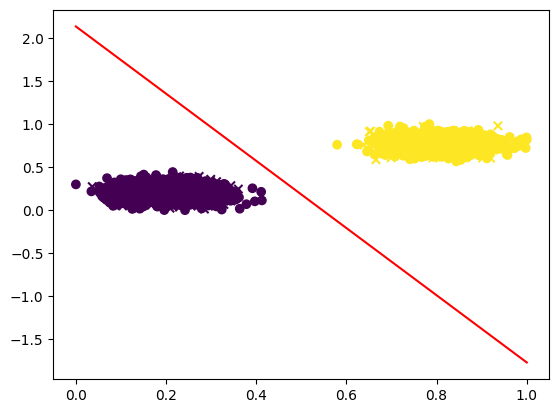

[ 0.27897571  0.07147357 -0.15250297]
Total error in training is: 0.0
accuracy: 100.0%
		True yes		True no
Predicted yes	1500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		1500 (100.0%)


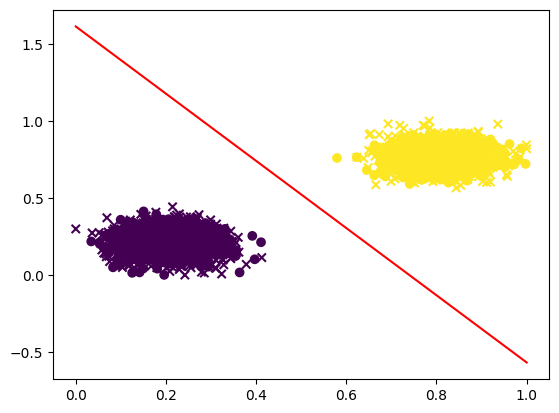

[ 0.19646881  0.09003194 -0.14533173]

GroupB
Total error in training is: 52.0
accuracy: 98.2%
		True yes		True no
Predicted yes	485 (97.0%)		3 (0.6%)
Predicted no	15 (3.0%)		497 (99.4%)


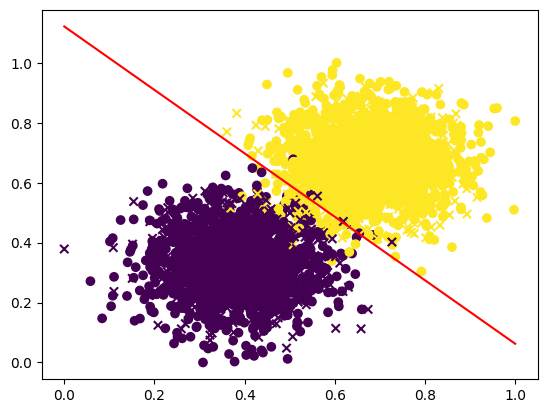

[ 1.05588254  0.99735713 -1.1182882 ]
Total error in training is: 33.0
accuracy: 98.57%
		True yes		True no
Predicted yes	1492 (99.47%)		35 (2.33%)
Predicted no	8 (0.53%)		1465 (97.67%)


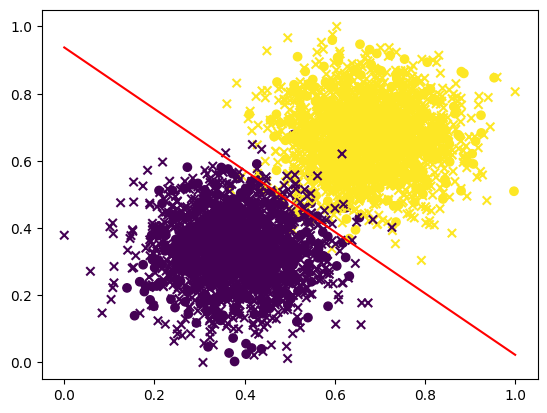

[ 0.50758557  0.55488559 -0.52025982]

GroupC
Total error in training is: 1096.0
accuracy: 70.4%
		True yes		True no
Predicted yes	324 (64.8%)		120 (24.0%)
Predicted no	176 (35.2%)		380 (76.0%)


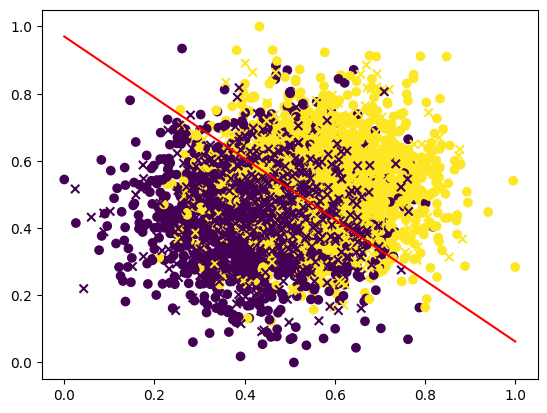

[ 0.3112224   0.34291122 -0.33267344]
Total error in training is: 378.0
accuracy: 69.07%
		True yes		True no
Predicted yes	755 (50.33%)		183 (12.2%)
Predicted no	745 (49.67%)		1317 (87.8%)


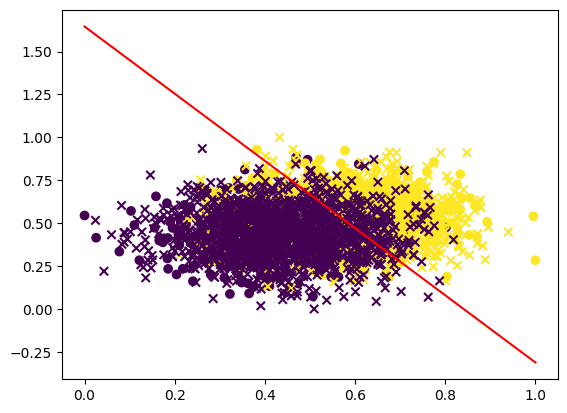

[ 0.36302438  0.18544309 -0.30519991]


In [6]:
# hard activation
print("HARD ACTIVATION")
print("---------------------------------------")
print("\nGroupA")
print(train(a, 3/4, 0.00001, 0.1, "hard"))
print(train(a, 1/4, 0.00001, 0.1, "hard"))

print("\nGroupB")
print(train(b, 3/4, 40, 0.1, "hard"))
print(train(b, 1/4, 40, 0.1, "hard"))

print("\nGroupC")
print(train(c, 3/4, 700, 0.1, "hard"))
print(train(c, 1/4, 700, 0.1, "hard"))

SOFT ACTIVATION
---------------------------------------

GroupA
Total error in training is: 1.064932035456229e-05
accuracy: 100.0%
		True yes		True no
Predicted yes	500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		500 (100.0%)


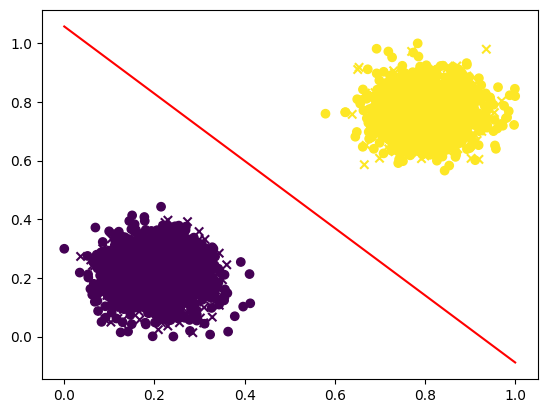

[ 46.12972227  40.24913665 -42.56868101]
Total error in training is: 2.604110565532603e-05
accuracy: 100.0%
		True yes		True no
Predicted yes	1500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		1500 (100.0%)


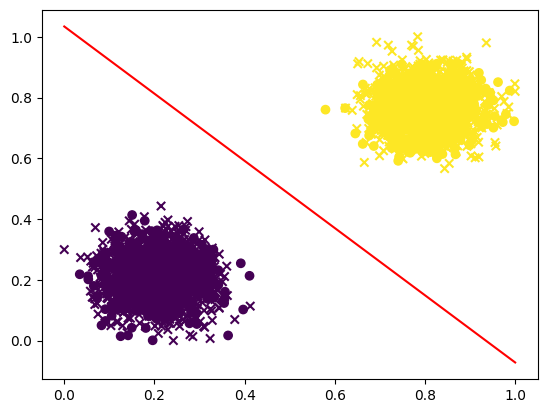

[ 40.81417511  36.90144417 -38.14992227]

GroupB
Total error in training is: 39.203113992677665
accuracy: 99.0%
		True yes		True no
Predicted yes	495 (99.0%)		5 (1.0%)
Predicted no	5 (1.0%)		495 (99.0%)


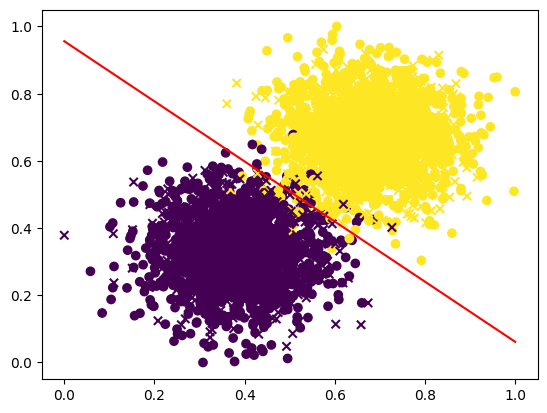

[ 24.35538656  27.22509216 -26.03063552]
Total error in training is: 35.27573002330954
accuracy: 98.7%
		True yes		True no
Predicted yes	1476 (98.4%)		15 (1.0%)
Predicted no	24 (1.6%)		1485 (99.0%)


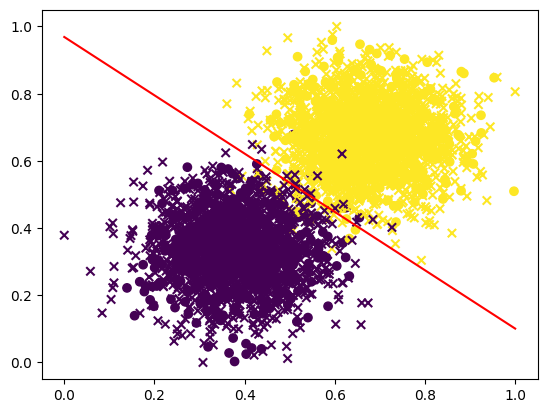

[ 11.92907886  13.74519143 -13.31550765]

GroupC
Total error in training is: 676.3867660095256
accuracy: 70.7%
		True yes		True no
Predicted yes	354 (70.8%)		147 (29.4%)
Predicted no	146 (29.2%)		353 (70.6%)


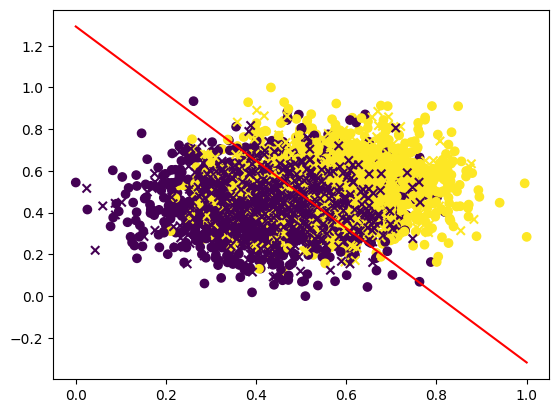

[ 5.18235956  3.21844912 -4.15910642]
Total error in training is: 238.9147087163377
accuracy: 54.03%
		True yes		True no
Predicted yes	134 (8.93%)		13 (0.87%)
Predicted no	1366 (91.07%)		1487 (99.13%)


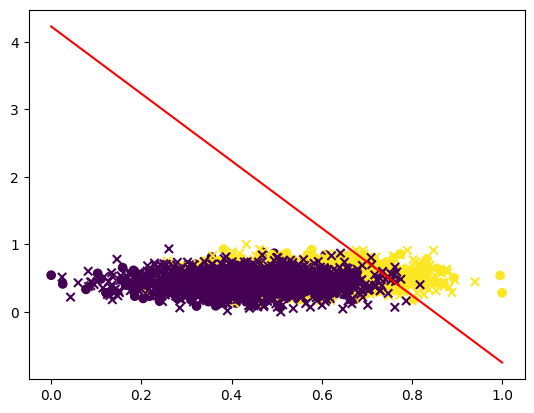

[ 2.29330035  0.46079272 -1.94838721]


In [7]:
#soft activation
print("SOFT ACTIVATION")
print("---------------------------------------")
print("\nGroupA")
print(train(a, 3/4, 0.00001, 0.1, "soft")) #75
print(train(a, 1/4, 0.00001, 0.1, "soft")) #25

print("\nGroupB")
print(train(b, 3/4, 40, 0.1, "soft"))#75
print(train(b, 1/4, 40, 0.1, "soft"))#25

print("\nGroupC")
print(train(c, 3/4, 700, 0.1, "soft"))#75
print(train(c, 1/4, 700, 0.1, "soft"))#25

# vt hacks
# umd hacks
# hacknc
# mlh major league hacks
# devpost